In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
cwd=os.getcwd()
filepath_train=os.path.join(cwd,'train.titanic.csv')
filepath_test=os.path.join(cwd,'test.titanic.csv')

In [3]:
# Read the data
X = pd.read_csv(filepath_train, index_col='PassengerId') 
X_test = pd.read_csv(filepath_test, index_col='PassengerId')
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X.shape

(891, 11)

In [5]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
X.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [7]:
X_test.isnull().sum().sort_values(ascending=False)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [8]:
X.dropna(axis=0,subset=['Embarked'],inplace=True)


In [9]:
# No rows with missing target. Separate target from predictors
y = X.Survived
X.drop(['Survived'], axis=1, inplace=True)


In [10]:
X.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
X.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [12]:
X.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [13]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [14]:
X.count()

Pclass      889
Name        889
Sex         889
Age         712
SibSp       889
Parch       889
Ticket      889
Fare        889
Cabin       202
Embarked    889
dtype: int64

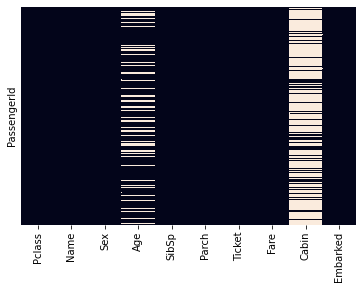

In [15]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False)

In [16]:
# We'll drop the Cabin column because it has too many missing values
X.drop('Cabin', axis=1, inplace=True)
X_test.drop('Cabin', axis=1, inplace=True)


In [17]:
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
cols_with_missing

['Age']

In [18]:
from sklearn.impute import SimpleImputer
# Imputation
my_imputer = SimpleImputer()
imputed_X = pd.DataFrame(my_imputer.fit_transform(X.Age.to_frame()))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test.Age.to_frame()))

In [19]:
X.Age[1:]=imputed_X.squeeze(axis=1)[1:]

<ipython-input-19-4b051cf9669e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Age[1:]=imputed_X.squeeze(axis=1)[1:]


In [20]:
X_test.Age[1:]=imputed_X_test.squeeze(axis=1)[1:]

<ipython-input-20-0ac9e3e6f3ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.Age[1:]=imputed_X_test.squeeze(axis=1)[1:]


In [21]:
X.drop(['Ticket','Name'], axis=1, inplace=True)
X_test.drop(['Ticket','Name'], axis=1, inplace=True)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [23]:
# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=0)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
365,3,male,29.642093,1,0,15.5000,Q
257,1,female,29.642093,0,0,79.2000,C
478,3,male,29.000000,1,0,7.0458,S
273,2,female,41.000000,0,1,19.5000,S
555,3,female,22.000000,0,0,7.7750,S


In [26]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), X_train.columns))
d = dict(zip(X_train.columns, object_nunique))

In [27]:
# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Sex', 2),
 ('Pclass', 3),
 ('Embarked', 3),
 ('SibSp', 7),
 ('Parch', 7),
 ('Age', 88),
 ('Fare', 232)]

In [28]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in X_train.columns if X_train[col].nunique() < 10]

In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
X_valid['Sex'] = encoder.transform(X_valid['Sex'])
X_test['Sex'] = encoder.transform(X_test['Sex'])

<ipython-input-29-fdc3e056b3c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
<ipython-input-29-fdc3e056b3c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid['Sex'])


In [30]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
X_train['Embarked'] = en.fit_transform(X_train['Embarked'])
X_valid['Embarked'] = en.transform(X_valid['Embarked'])
X_test['Embarked'] = en.transform(X_test['Embarked'])

<ipython-input-30-caa29fc533d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked'] = en.fit_transform(X_train['Embarked'])
<ipython-input-30-caa29fc533d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Embarked'] = en.transform(X_valid['Embarked'])


In [31]:
print("MAE") 
print(score_dataset(X_train, X_valid, y_train, y_valid))

MAE
0.24157303370786518


In [32]:
X_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.636364,30.142871,0.447368,0.392344,35.627188,1.401914
std,0.841838,0.481622,12.637111,0.896760,0.981429,55.907576,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,29.642093,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [33]:
# Imputation 
imputer_fare = SimpleImputer()
i_X_train = pd.DataFrame(imputer_fare.fit_transform(X_train.Fare.to_frame()))
i_X_test = pd.DataFrame(imputer_fare.transform(X_test.Fare.to_frame()))


In [34]:
X_test.Fare[1:]=i_X_test.squeeze(axis=1)[1:]

<ipython-input-34-a0ed9f5d0ede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.Fare[1:]=i_X_test.squeeze(axis=1)[1:]


In [35]:
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
X=pd.concat([X_train,X_valid], axis=0)
y=pd.concat([y_train,y_valid], axis=0)
model.fit(X,y)

RandomForestClassifier(max_depth=5, random_state=1)

In [36]:
preds_test = model.predict(X_test)
# Save test predictions to file
output = pd.DataFrame({'PassengerId': X_test.index,
                       'Survived': preds_test})
output.to_csv('sub.csv', index=False)

In [37]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
